# Sexing unsexed <i>Rana iberica</i> samples

During our sampling trip, we were unable to collect a good number of sex-able adults. In some spots we could collect only juviniles or tadpoles. However we do have two locations (Galicia and Madrid) with a good number of males and females and in which it is possible to find sex linked markers.

My plan here is to find the sets of loci which show sex linkage across both Galicia and Madrid populations and then to attempt to bioinformatically sex the remaining samples using these loci. Alternatively, I could identify genomic regions which show consistent sex linkage and use tags in that region as the same tags might not be present in all samples / populations. 

If this successfully identifies two clusters of samples in the dataset (e.g. using STRUCTURE, STRUCTURE HARVESTER (Delta k support for k=2)) I can use those two groups as males and females to test for sex linkage in the whole dataset. 

This could be viewed as circular, however using the permutation approach to shuffle the male and female assignments should get around this issue if it shows that no other m/f assignment combination results in a significant number of sex linked markers. 


Thoughts on permutation tests.

I normally do ~100 permutations. But what about doing all permutations? How to find the number of possible combinations of males and females from a given sample set?

The eqation to find the number of possible combinations from a given vector of items is:

nCr = n! / r! * (n - r)! where n represents the total number of items, and r represents the number of items being chosen at a time

Here we can just choose number of males as the number of females will be whats left and will take care of itself. So that would mean nCr becomes nCm where m is number of males in the actual dataset. So for CS Ribe for example, this would be:

nCm = 60!/ 30! * (60-30)! = 9.5e113

Ok so not in any way tenable. Stick with the 100 iterations. 


## Step 1. Finding reference sex linked markers from reliable M/F samples.

First, I will use my usual approach to find sex linked markers in the Galician and Madrid populations. 

In [3]:
## Python 2 modules
from matplotlib import pyplot as plt
import MISC_RAD_tools as MISC 
from collections import Counter

In [1]:
## Python 3 modules
from matplotlib import pyplot as plt
import MISC_RAD_tools_py3 as MISC3
import allel
from collections import Counter
import seaborn

### 1a. Run PCA to check for cryptic popualtion structure across the dataset as a whole. POPULATION: CS

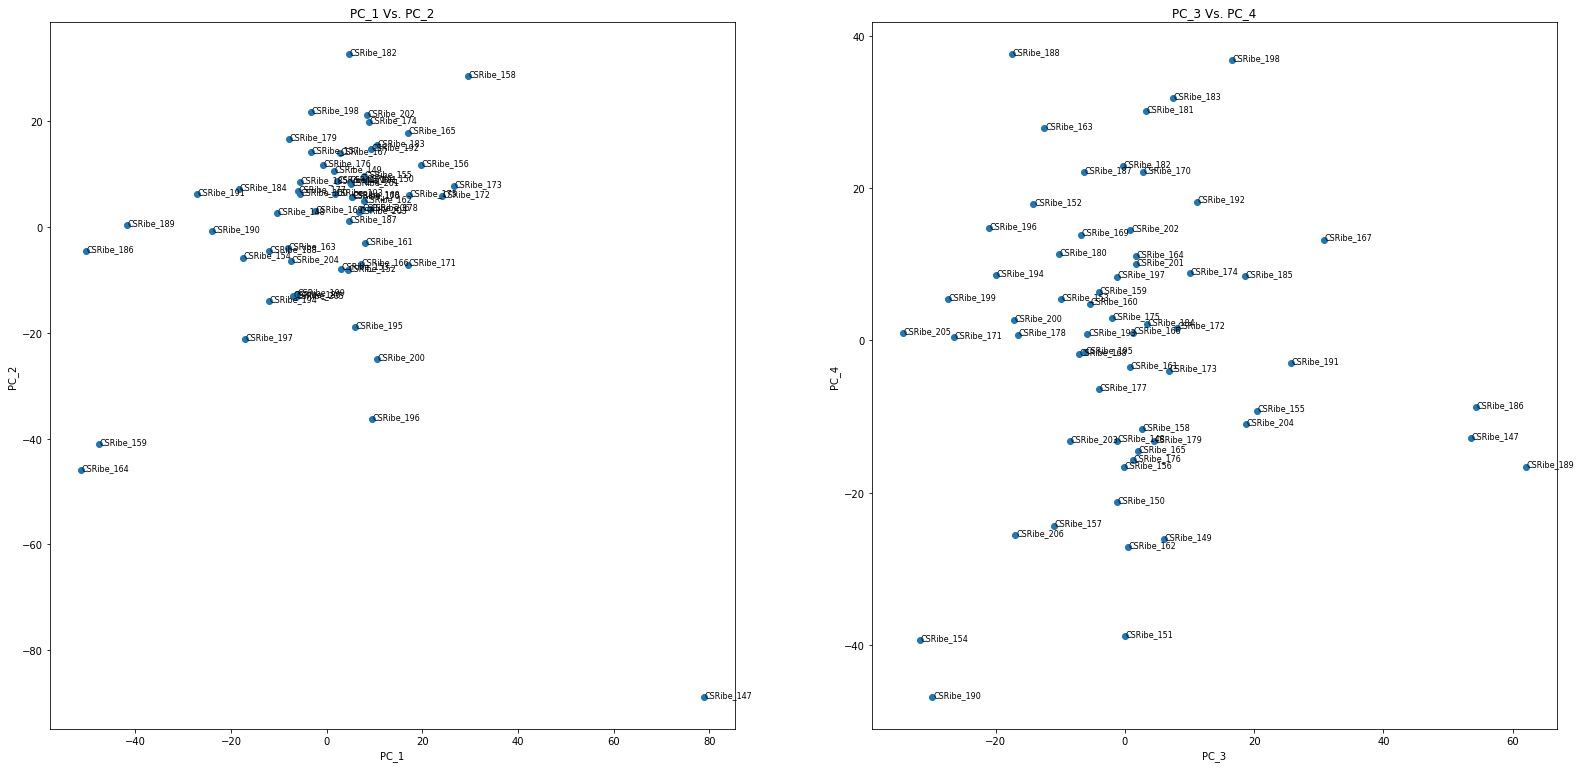

In [2]:
MISC3.PCA_from_VCF("/home/djeffrie/Data/RADseq/Yberica/VCF_CS/batch_1.vcf")

No apparent population structure

### 1b. Search for sex linked markers. POPULATION: CS

In [3]:
Parameter_dict_CS = {}

##### Data ########################

Parameter_dict_CS['Catalog'] =  "/home/djeffrie/Data/RADseq/Yberica/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict_CS['VCF'] =  "/home/djeffrie/Data/RADseq/Yberica/VCF_CS/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict_CS['Pop_map'] = "/home/djeffrie/Data/RADseq/Yberica/VCF_CS/CS_sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict_CS['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict_CS['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_CS['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_CS['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict_CS['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict_CS['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict_CS['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict_CS['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict_CS['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict_CS['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict_CS['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 8700
Number of samples = 60
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 8699
Number of putative X linked snps = 0
Number of putative X linked tags = 0
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


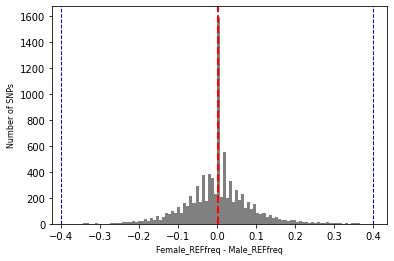


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 8700
Number of samples = 60
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 8699
Number of putative X linked snps = 21
Number of putative X linked tags = 21
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 30
Number of males: 30
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###



/home/djeffrie/.local/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")
/home/djeffrie/.local/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")
/home/djeffrie/.local/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:47: UserWarning: All circles have zero area
  warnings.warn("All circles have zero area")


Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Yberica

 ## After merging tags accross methods ## 

Final number of XY tags = 21
Final number of ZW tags = 0


In [4]:
import MISC_RAD_tools_py3 as MISC3
strictXYset_CS, strictZWset_CS = MISC3.Super_SLM_finder(Parameter_dict_CS, "111")

I will now plot genotypes at these loci to see if they are behaving as expected relative to our sex assignments

In [4]:
CS_vcf = "/home/djeffrie/Data/RADseq/Yberica/VCF_CS/batch_1.vcf"
CS_SL_outs = "CS_SLtags.vcf"
MISC3.filter_vcf(CS_vcf, strictXYset_CS, CS_SL_outs)

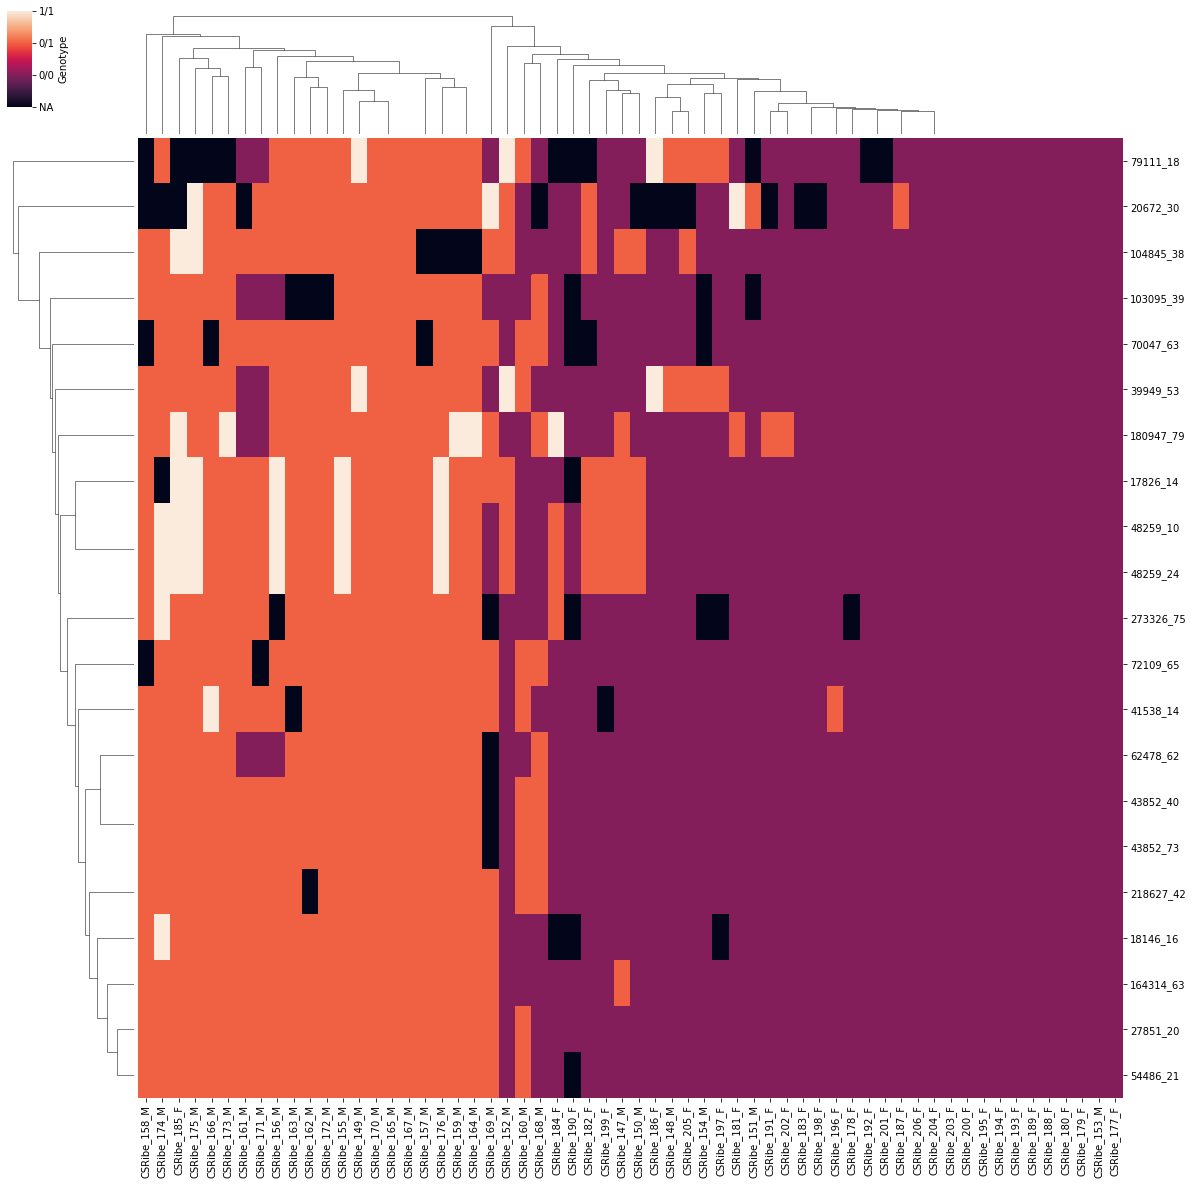

In [7]:
CS_vcf = "/home/djeffrie/Data/RADseq/Yberica/VCF_CS/CS_SLtags.vcf"
popmap = "/home/djeffrie/Data/RADseq/Yberica/VCF_CS/CS_sex_ID_info.txt"
MISC3.Heatmap_from_VCF(CS_vcf, popmap)

It looks to me like there are several (in fact quite a few) samples which are mis-sexed here. This might be due to ambiguous morphology in juveniles or actually because of sex reversals. So lets putatitvely correct these and see if it makes a difference to the number of sex linked markers identified. Note that this is close to being circular data-doctoring, however the permutation tests later will tell us if the new sex assignments are real or not. 

Corrections:

CSRibe_147  M  >  F  
CSRibe_148  M  >  F  
CSRibe_150  M  >  F  
CSRibe_151  M  >  F  
CSRibe_152  M  >  F  
CSRibe_153  M  >  F  
CSRibe_154  M  >  F  
CSRibe_185  F  >  M  



##### Using SNP frequency approach #### 

Number of loci = 8700
Number of samples = 60
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 8699
Number of putative X linked snps = 27
Number of putative X linked tags = 27
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0


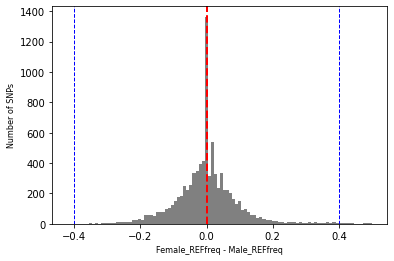


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 8700
Number of samples = 60
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 8699
Number of putative X linked snps = 25
Number of putative X linked tags = 25
Number of putative Z linked markers = 0
Number of putative Z linked tags = 0

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 36
Number of males: 24
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###



/home/djeffrie/.local/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")
/home/djeffrie/.local/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:47: UserWarning: All circles have zero area
  warnings.warn("All circles have zero area")


Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Yberica

 ## After merging tags accross methods ## 

Final number of XY tags = 39
Final number of ZW tags = 0


In [8]:
Parameter_dict_CS['Pop_map'] = "/home/djeffrie/Data/RADseq/Yberica/VCF_CS/CS_sex_ID_info_corrected.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.
strictXYset_CS, strictZWset_CS = MISC3.Super_SLM_finder(Parameter_dict_CS, "111")

So it looks like we have more tags, and the frequency approach worked this time, whereas it didn't before. Lets look at PCA and heatmap again.

In [11]:
CS_vcf = "/home/djeffrie/Data/RADseq/Yberica/VCF_CS/batch_1.vcf"
CS_SL_outs = "CS_SLtags.vcf"
MISC3.filter_vcf(CS_vcf, strictXYset_CS, CS_SL_outs)

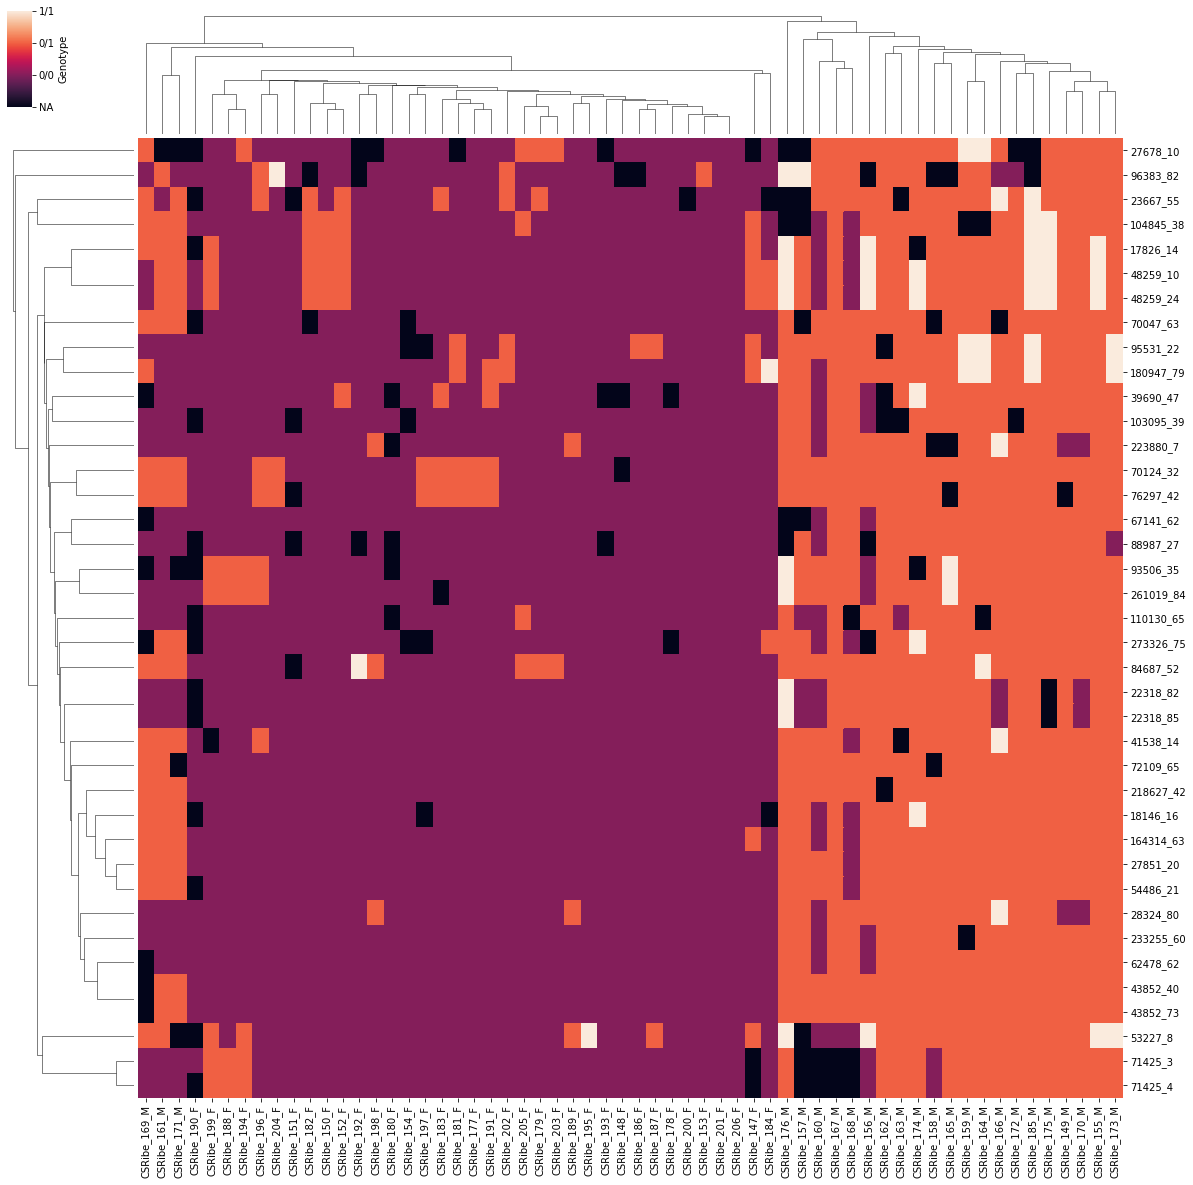

In [13]:
CS_vcf = "/home/djeffrie/Data/RADseq/Yberica/VCF_CS/CS_SLtags.vcf"
popmap = "/home/djeffrie/Data/RADseq/Yberica/VCF_CS/CS_sex_ID_info_corrected.txt"
MISC3.Heatmap_from_VCF(CS_vcf, popmap)

### 1b. Search for sex linked markers. POPULATION: SA

In [14]:
Parameter_dict = {}

##### Data ########################

Parameter_dict['Catalog'] =  "/home/djeffrie/Data/RADseq/Yberica/batch_1.catalog.tags.tsv.gz" ## Path to the catalog file - used by all approaches.
Parameter_dict['VCF'] =  "/home/djeffrie/Data/RADseq/Yberica/VCF_SA/batch_1.vcf" ## path to vcf file (note this will be altered to make header compatible with Pyvcf. New vcf will have same name with ".altered" appended to the end). Used by Approach i) and ii)
Parameter_dict['Pop_map'] = "/home/djeffrie/Data/RADseq/Yberica/VCF_SA/SA_Sex_ID_info.txt" ## path to population map file containing sex information. Same format as Stacks pop map file. Used by all approaches.

###### threshold parameters #######

# 1. Frequency approach
Parameter_dict['X_or_Z_freq_threshold'] = 0.4  ## (Default = 0.4) The lower threshold for the freq caluclation to find sex linked snps, e.g. for an XY system, a threshold of 0.4 means that f(F) - f(M) can be >= 0.4 and <= 0.6 (the upper threshold is automatically calculated to be the same distance above 0.5 as the lower threshold is below 0.5) 
Parameter_dict['sample_presence_cutoff1'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold1'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci below this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold1'] =  0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 
Parameter_dict['homogametic_REF_allele_freq'] = 0.9 ## (Default = 0.95) The sex linked SNP will be the minor allele, so a check is done to make sure that the homogametic sex is above the threshold specified for the major allele. In theory this should be 1. But allowing for some error 0.95 is used as a default. 

# 2. Heterozygosity approach
Parameter_dict['homogamtic_homozygosity_threshold'] = 0.9 ## (Default = 0.9) The minimum number of the homogametic sex which must not have the tag for that tag to be considered linked to the sex-limited chromosome
Parameter_dict['heterogamtic_heterozygosity_threshold'] = 0.6 ## (Default = 0.5) The lower threshold for the proportion of heterozygotes in the heterogametic sex at a locus 
Parameter_dict['sample_presence_cutoff2'] = 0.75 ## (Default = 0.75) a locus must be called in at least this proportion of all samples (not within populations) to be considered
Parameter_dict['coverage_threshold2'] = 3 ## (Default = 3) a locus must have at least this threshold in a sample to be considered for that sample. Note that loci bels this threshold will be removed from a sample, and this can push the locus below the sample presence cut-off, which will then remove the locus.
Parameter_dict['maf_threshold2'] = 0.05 ## (Default = 0.05) minor allele frequency cutoff for a locus across all samples. 

# 3. Sex specific presence or absence approach
Parameter_dict['sex_presence_threshold'] =  0.5 ## (Default = 0.5) The minimum percenatage of the heterogametic sex that a tag must be present in.



##### Using SNP frequency approach #### 

Number of loci = 2112
Number of samples = 50
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 2111
Number of putative X linked snps = 102
Number of putative X linked tags = 102
Number of putative Z linked markers = 3
Number of putative Z linked tags = 3


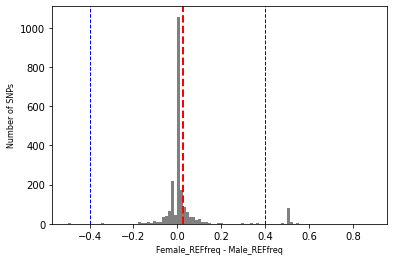


***DONE!***


##### Using SNP heterozygosity approach #####
 
Number of loci = 2112
Number of samples = 50
Number of loci with too few samples = 0
Number of loci with low MAF = 0
Number of loci with enough data = 2111
Number of putative X linked snps = 107
Number of putative X linked tags = 107
Number of putative Z linked markers = 3
Number of putative Z linked tags = 3

 ### DONE! ### 


##### Using Sex specific tag approach ##### 


SUMMARY:
Number of females: 29
Number of males: 35
Number of Putative Y linked tags: 0
Number of Putative W linked tags: 0

 ### DONE! ###



/home/djeffrie/.local/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


Sex linked tags outputted to fastas 'Putative_XYlinked_makers.fa' and Putative_ZWlinked_makers.fa
in the directory /home/djeffrie/Data/RADseq/Yberica

 ## After merging tags accross methods ## 

Final number of XY tags = 107
Final number of ZW tags = 3


In [15]:
strictXYset_SA, strictZWset_SA = MISC3.Super_SLM_finder(Parameter_dict, "111")

In [20]:
vcf = "/home/djeffrie/Data/RADseq/Yberica/VCF_SA/batch_1.vcf"
SL_outs = "SA_SLtags.vcf"
MISC3.filter_vcf(vcf, strictXYset_SA, SL_outs)

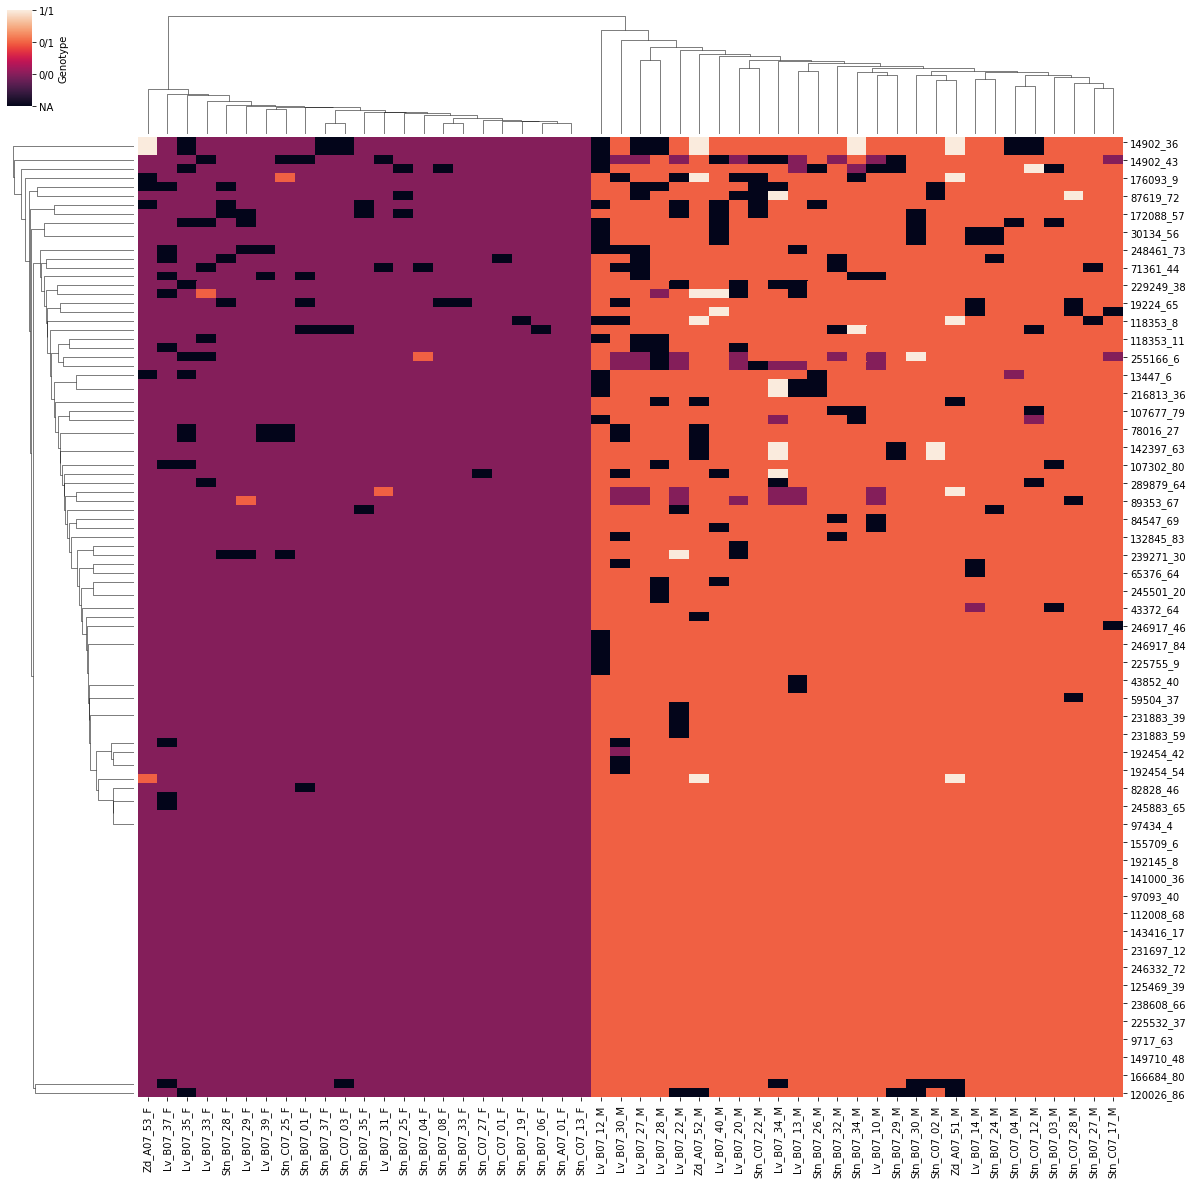

In [22]:
popmap = "/home/djeffrie/Data/RADseq/Yberica/VCF_SA/SA_Sex_ID_info.txt"
MISC3.Heatmap_from_VCF("/home/djeffrie/Data/RADseq/Yberica/VCF_SA/SA_SLtags.vcf", popmap)

### Shared sex linked markers

So now I want to find out how many loci are sex linked in both SA and CS population. So we need to remember here that there are two levels on which a marker could match. The <b>SAME SNP</b> could be present in both, or the same tag could have sex linked SNPs in both, but not the same SNP. 

So first, how many tags are sex linked in both popualtions?

In [25]:
combined = [i.split("_")[0] for i in strictXYset_SA] + [i.split("_")[0] for i in strictXYset_CS]

In [27]:
Counted = Counter(combined)

for i in Counted:
    if Counted[i] > 1:
        print(i)

173658
14902
231193
192454
43852
231883
39793
118353
78693
246917
163957
107507
22318
71425
48259


The answer, 13. So how many of these are because of the same sex linked SNP?

In [28]:
combined_SNPs = list(strictXYset_SA) + list(strictXYset_CS)

In [29]:
Counted_SNPs = Counter(combined_SNPs)

for i in Counted_SNPs:
    if Counted_SNPs[i] > 1:
        print(i)

43852_40_3815079


<b>ONLY ONE!</b>

So of the sex linked tags above, what are the SNPs on them?

In [30]:
Counted = Counter(combined)

for i in Counted:
    if Counted[i] > 1:
        for j in Counted_SNPs:
            if i in j:
                print(j)

173658_42_15108203
173658_47_15108208
14902_43_1296432
14902_36_1296425
231193_24_20113730
231193_40_20113746
192454_42_16743455
192454_54_16743467
43852_40_3815079
43852_73_3815112
231883_39_20173775
231883_59_20173795
39793_53_3461959
39793_85_3461991
118353_11_10296637
118353_8_10296634
78693_49_6846255
78693_29_6846235
246917_46_21481740
246917_84_21481778
163957_20_14264194
163957_21_14264195
107507_53_9353077
107507_3_9353027
22318_85_1941666
22318_82_1941663
71425_4_6213894
71425_3_6213893
48259_10_4198458
48259_24_4198472


So we can see here that each of these tags has two SNPs in our combined set, one in each of the populations. So the question is, where are these in the genome? Are they found together? If so, they should hopefully retain some of their sex-diagnostic abilities in the rest of the dataset!!

To do:

Align ALL tags to the genome. Then see where these guys are. Then we can see if there is a cluster. I expect there should be as the CS population has a particularly narrow sex linked region by the looks of things. 

In [46]:
XML = "/home/djeffrie/Data/RADseq/Yberica/CS_SA_tag_alignment/CS_SA_RADtag_alignments.xml"
genome = "/home/djeffrie/Data/Genomes/Rtemp_hybrid/Assembly/ANCHORED_PURGED/Rtemp_primaries.fasta.gz"
eval_diff = 1e-3
eval_thresh = 1e-10


retained_hits = MISC.BlastParseExtra(XML, genome, eval_diff, eval_thresh)

Getting subject scaffold segments from /home/djeffrie/Data/Genomes/Rtemp_hybrid/Assembly/ANCHORED_PURGED/Rtemp_primaries.fasta.gz . . . 
0 sequence scaffold segments are in /home/djeffrie/Data/RADseq/Yberica/CS_SA_tag_alignment/blast_2000_chunks.fa


In [31]:
len(retained_hits)

2017

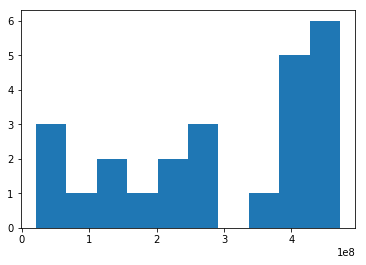

In [45]:
plt.figure()
hit_coords = []
for i in retained_hits:
    if retained_hits[i]['Ref_hit_id'] == "chr3":
        if i in combined:
            hit_coords.append(retained_hits[i]['Hit_start_coord'])

plt.hist(hit_coords, bins = 10)
plt.show()
        

So there is not an obvious clustering of loci here. There might be a peak at the right hand side, but this is not where the RADsex peak was in CS. Also this is just number of sex linked markers, not their sex linkage itself. 

So I don't think using genome position is going to work particularly well. I think the best thing to do is to generate VCFs for subsets of the unsexed samples, which are close to the popualtions where samples are sexed. For example, the Madrid samples are close to the CS_Ribe (Gredos) samples and thus might have a somewhat similar Y haplotype. I can take a look at this by plotting a clusterplot as above, with only the sex linked markers in Gredos, for the Gredos pop plus the Madrid popualtions. 

## MADRID populations

Steps:

1. Run populations for MADRID popualtions along with GREDOS.
2. Filter VCF for only loci sex linked in GREDOS
3. Plot cluster map 

In [5]:
vcf = "/home/djeffrie/Data/RADseq/Yberica/VCF_MAD/batch_1.vcf"
SL_outs = "MAD_CSSLtags.vcf"
MISC3.filter_vcf(vcf, strictXYset_CS, SL_outs)

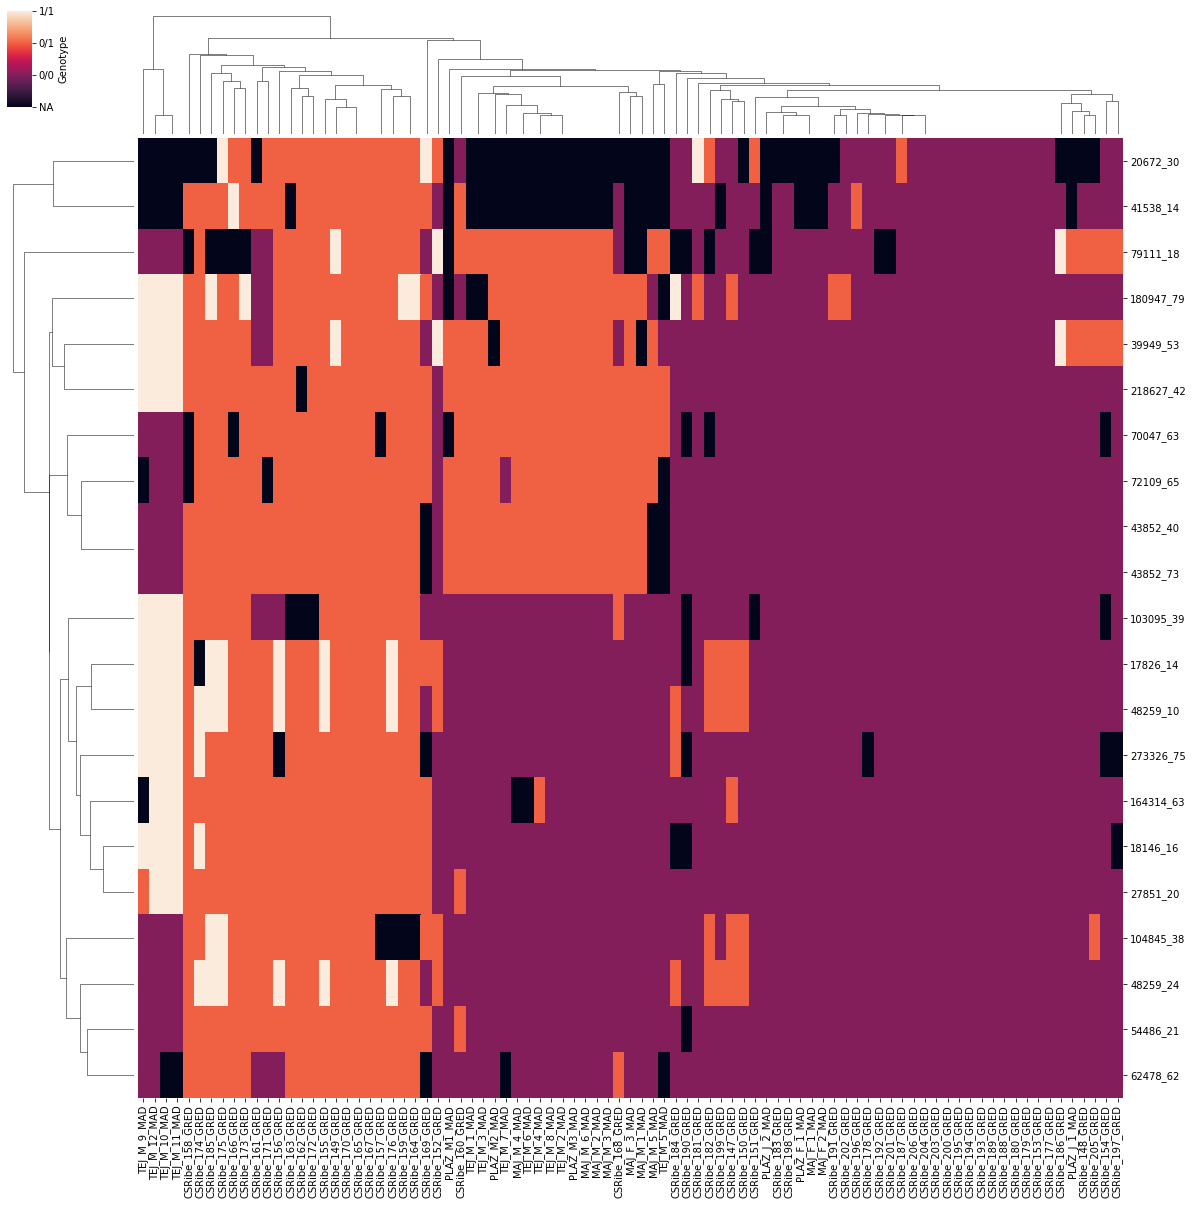

In [7]:
popmap = "/home/djeffrie/Data/RADseq/Yberica/VCF_MAD/popmap_MAD_CS.txt"
MISC3.Heatmap_from_VCF("/home/djeffrie/Data/RADseq/Yberica/VCF_MAD/MAD_CSSLtags.vcf", popmap)

## GUADALUPE populations

Steps:

1. Run populations for GUAD popualtions along with GREDOS.
2. Filter VCF for only loci sex linked in GREDOS
3. Plot cluster map 

In [9]:
vcf = "/home/djeffrie/Data/RADseq/Yberica/VCF_GUAD/batch_1.vcf"
SL_outs = "GUAD_CSSLtags.vcf"
MISC3.filter_vcf(vcf, strictXYset_CS, SL_outs)

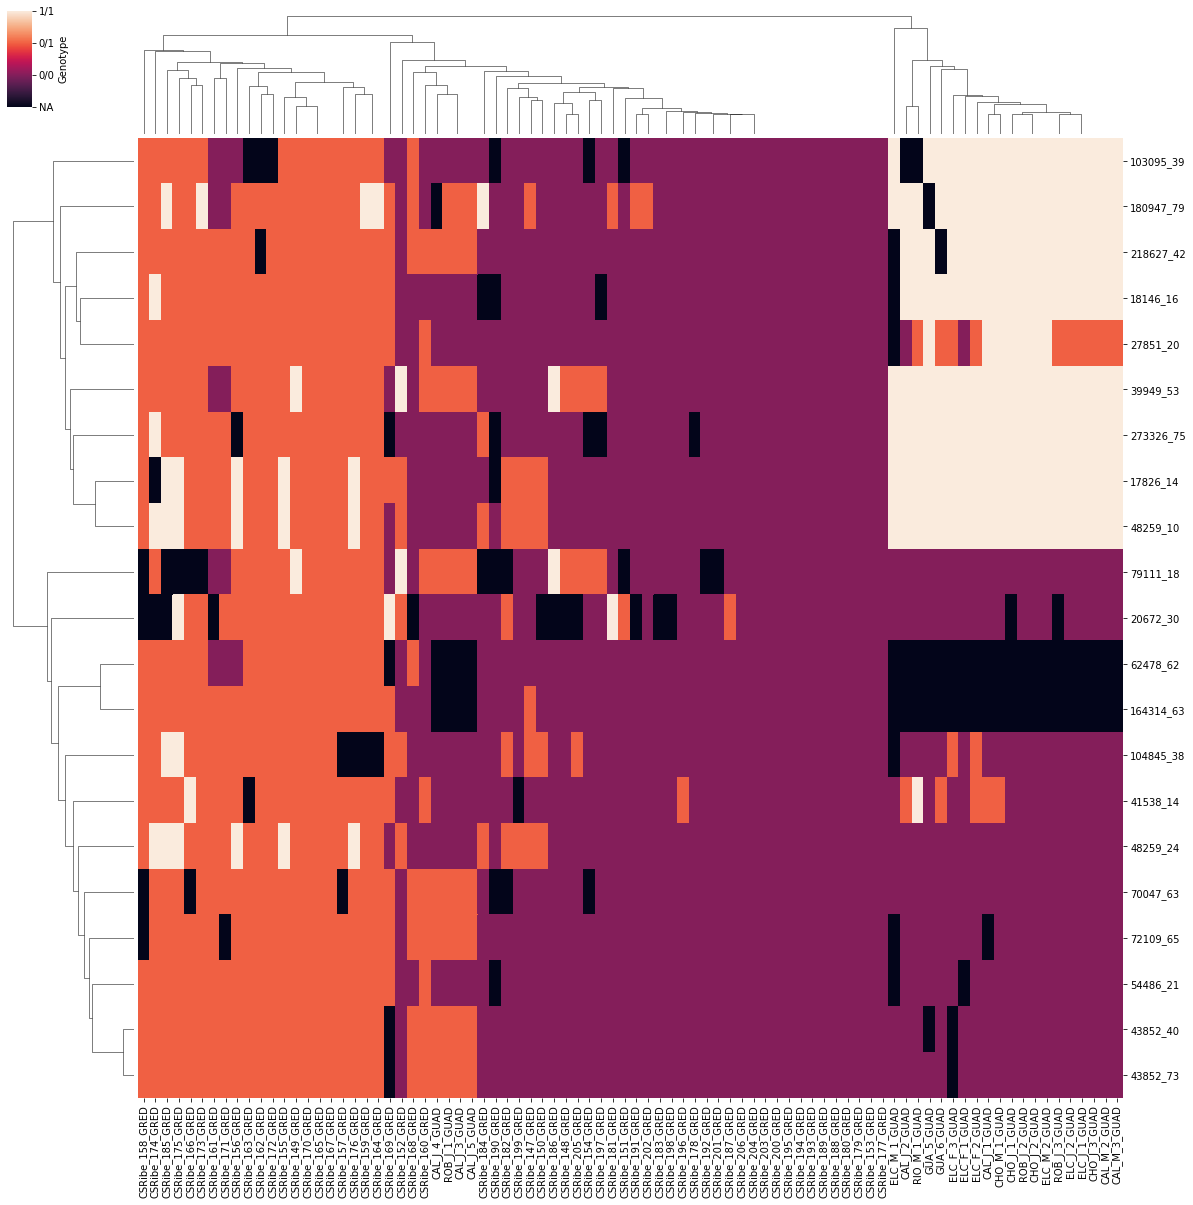

In [10]:
popmap = "/home/djeffrie/Data/RADseq/Yberica/VCF_GUAD/popmap_GUAD_CS.txt"
MISC3.Heatmap_from_VCF("/home/djeffrie/Data/RADseq/Yberica/VCF_GUAD/AD_CSSLtags.vcf", popmap)

## Rdc2 populations

Steps:

1. Run populations for GUAD popualtions along with GREDOS.
2. Filter VCF for only loci sex linked in GREDOS
3. Plot cluster map 

In [14]:
vcf = "/home/djeffrie/Data/RADseq/Yberica/VCF_Rdc2/batch_1.vcf"
SL_outs = "Rdc2_CSSLtags.vcf"
MISC3.filter_vcf(vcf, strictXYset_CS, SL_outs)

In [1]:
## Python 3 modules
from matplotlib import pyplot as plt
import MISC_RAD_tools_py3 as MISC3
import allel
from collections import Counter
import seaborn

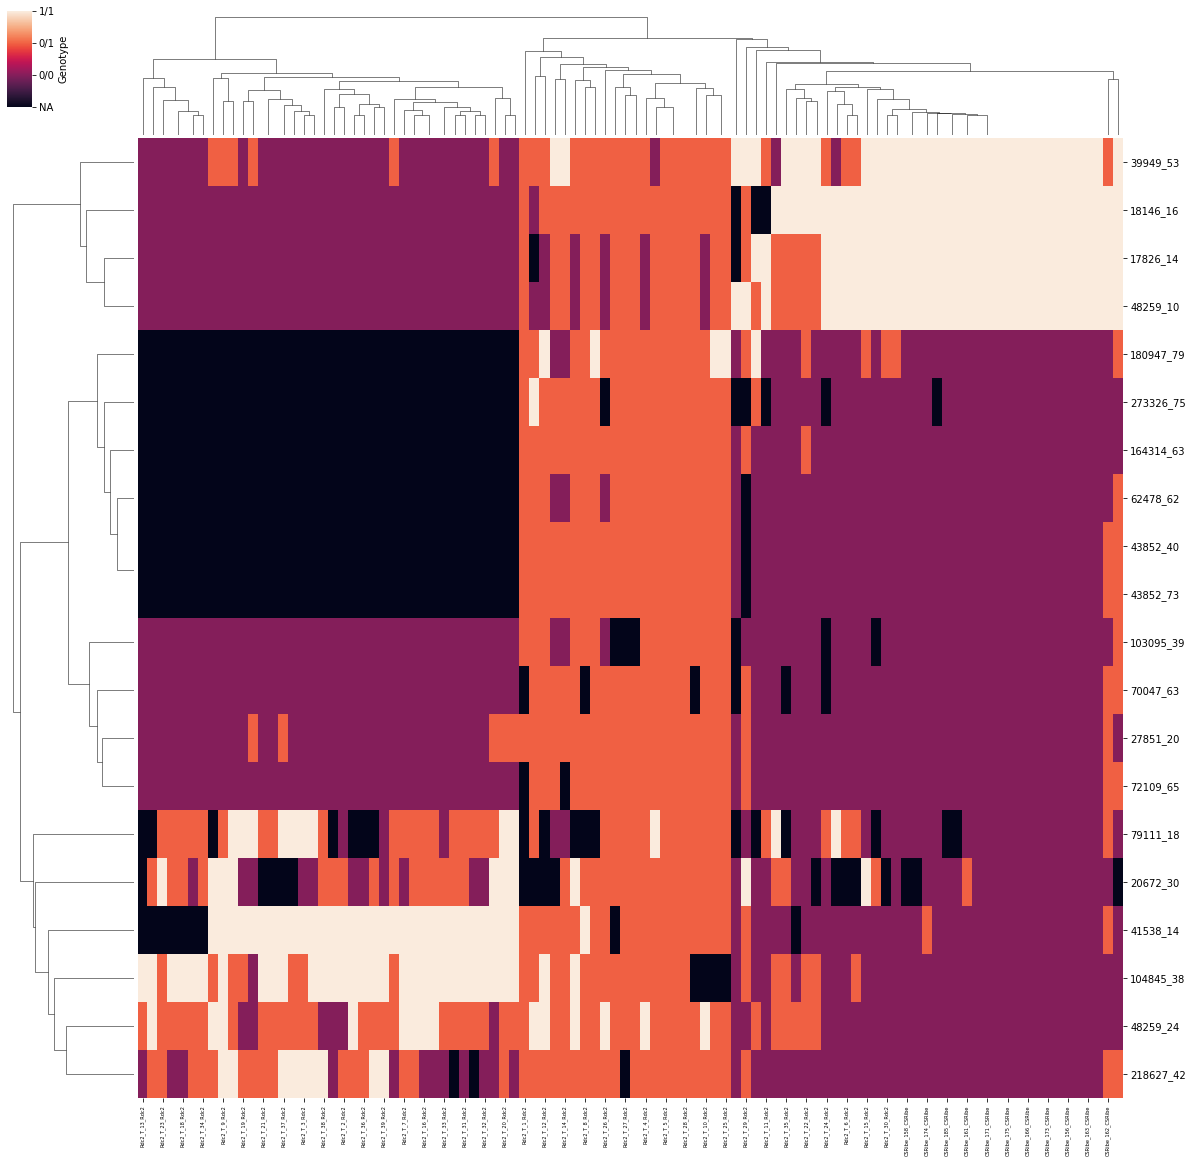

In [2]:
popmap = "/home/djeffrie/Data/RADseq/Yberica/VCF_Rdc2/popmap_Rdc2_CS.txt"
MISC3.Heatmap_from_VCF("/home/djeffrie/Data/RADseq/Yberica/VCF_Rdc2/Rdc2_CSSLtags.vcf", popmap)

## LOU populations

Steps:

1. Run populations for GUAD popualtions along with GREDOS.
2. Filter VCF for only loci sex linked in GREDOS
3. Plot cluster map 

In [7]:
vcf = "/home/djeffrie/Data/RADseq/Yberica/VCF_LOU/batch_1.vcf"
SL_outs = "LOU_CSSLtags.vcf"
MISC3.filter_vcf(vcf, strictXYset_CS, SL_outs)

In [1]:
## Python 3 modules
from matplotlib import pyplot as plt
import MISC_RAD_tools_py3 as MISC3
import allel
from collections import Counter
import seaborn

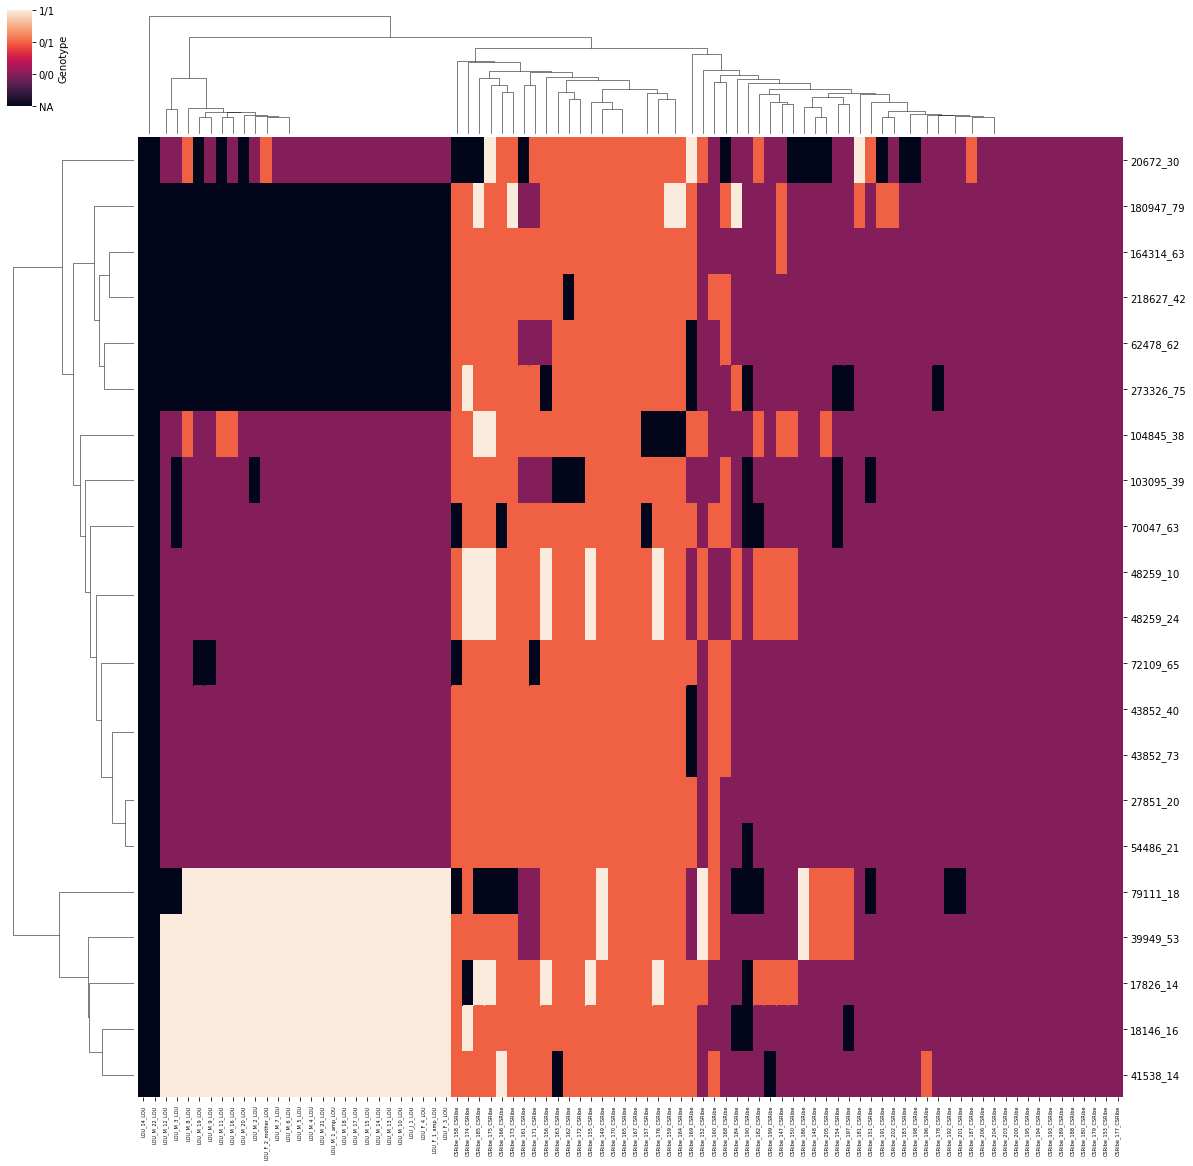

In [9]:
popmap = "/home/djeffrie/Data/RADseq/Yberica/VCF_LOU/popmap_LOU_CS.txt"
MISC3.Heatmap_from_VCF("/home/djeffrie/Data/RADseq/Yberica/VCF_LOU/LOU_CSSLtags.vcf", popmap)